<a href="https://colab.research.google.com/github/tinkam17/Stock-prediction-model/blob/main/IPL_PROBABLITY_PRIDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL** **PROBABLITY** **PRIDICTOR**

In [183]:
import numpy as np
import pandas as pd

In [184]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [251]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

In [257]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df

In [190]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [ ]:
total_score_df

In [192]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

In [ ]:
match_df['team1'].unique()

In [195]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [196]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [197]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [198]:
match_df.shape

(641, 20)

In [199]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df

In [201]:
match_df = match_df[['match_id','city','winner','total_runs']]


In [202]:
delivery_df = match_df.merge(delivery,on='match_id')

In [203]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [206]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [207]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

In [ ]:
delivery_df.head()

In [211]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [212]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [213]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [214]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [215]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [216]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()


In [219]:
final_df.dropna(inplace=True)

In [220]:
final_df = final_df[final_df['balls_left'] != 0]

In [221]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

In [223]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [225]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])


In [ ]:
pipe.fit(X_train,y_train)

In [227]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


In [ ]:
pipe.predict_proba(X_test)[10]

In [230]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [231]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target = match_progression(delivery_df, 74,pipe)
temp_df

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
temp_df,target = match_progression(delivery_df,83,pipe)
temp_df

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
temp_df,target = match_progression(delivery_df,88,pipe)
temp_df

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams


In [ ]:
delivery_df['city'].unique()

In [240]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [243]:
# No. of matches won by each team
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

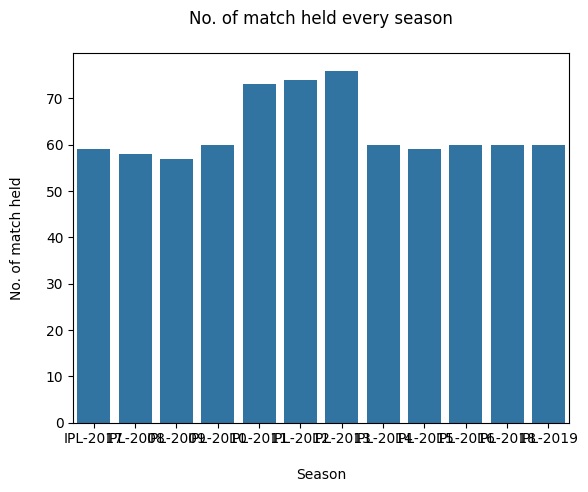

In [244]:
# Plot to visualise the no. of match held every season
sns.countplot(x='Season', data=match)
plt.title('No. of match held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of match held\n')
plt.show()

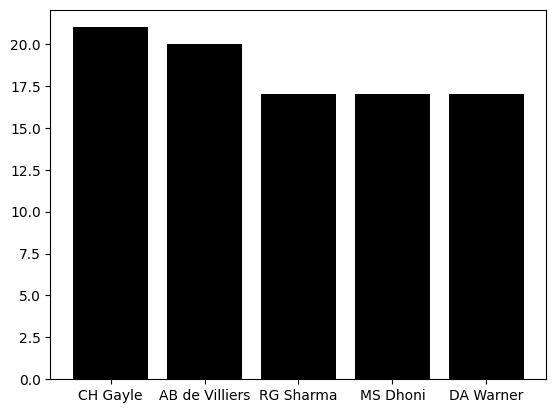

In [247]:
import matplotlib.pyplot as plt
#Making a Barplot of top 5 player
plt.bar(list(match['player_of_match'].value_counts()[0:5].keys()),list(match['player_of_match'].value_counts()[0:5]),color='black')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

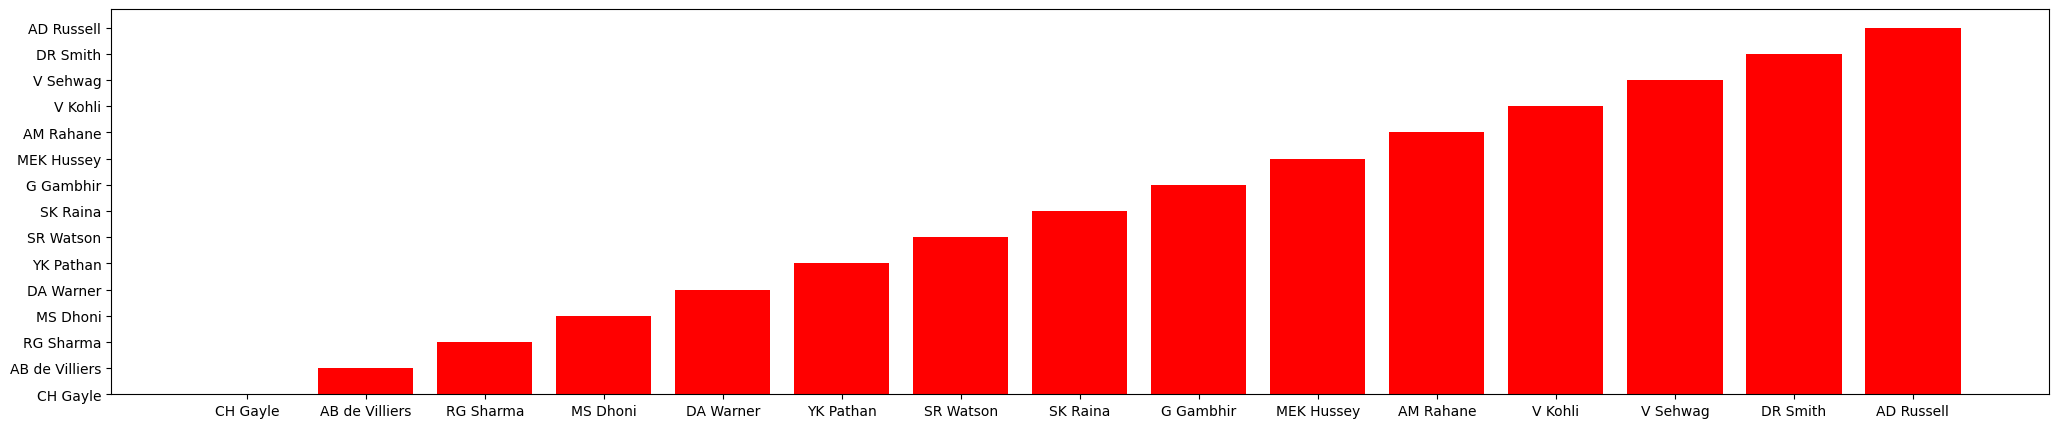

In [261]:
plt.figure(figsize=(25,5))
plt.bar(list(match["player_of_match"].value_counts()[0:15].keys()),list(match["player_of_match"].value_counts()[0:15].keys()),color="r")
plt.show